#primeira atividade

In [66]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import folium

In [67]:
def get_api_data(api_url:str):
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    
    return None


def get_city_geolocation(city_name:str):
  api_key = "d1af9eb638a7a24e06f0889f9e2c6a0d"
  api_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name},Piaui,BR&appid=d1af9eb638a7a24e06f0889f9e2c6a0d"

  data = get_api_data(api_url)

  return {"latitude": data[0]['lat'], "longitude": data[0]['lon']}


def load_file_data(dataset_path:str, dataset_name:str):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

def filter_data(database):

    city = []
    confirmed = []
    deaths = []
    population = []
    death_rate = []
    latitude = []
    longitude = []
    
    for data in database.values:
        if data[0] == "2022-03-26" and data[1] == "PI" and data[3] == "city":
            
            geolocation = get_city_geolocation(data[2])
            
            city.append(data[2])
            confirmed.append(data[4])
            deaths.append(data[5])
            population.append(data[7])
            death_rate.append(data[10])

            latitude.append(geolocation['latitude'])
            longitude.append(geolocation['longitude'])

            print(data[2])


    return pd.DataFrame({
        "city": city,
        "confirmed": confirmed,
        "deaths": deaths,
        "population": population, 
        "death_hate": death_rate, 
        "latitude": latitude, 
        "longitude": longitude
    })

In [68]:
covid_database = load_file_data("/home/jcsf/Dev/Sistemas Inteligentes/Atividade Visualização de casos de COVID-19 no Piauí", "covid19database.csv")

covid_filtered_data = filter_data(covid_database)

covid_filtered_data.head(5)

Acauã
Agricolândia
Água Branca
Alagoinha do Piauí
Alegrete do Piauí
Alto Longá
Altos
Alvorada do Gurguéia
Amarante
Angical do Piauí
Anísio de Abreu
Antônio Almeida
Aroazes
Aroeiras do Itaim
Arraial
Assunção do Piauí
Avelino Lopes
Baixa Grande do Ribeiro
Barra D'Alcântara
Barras
Barreiras do Piauí
Barro Duro
Batalha
Bela Vista do Piauí
Belém do Piauí
Beneditinos
Bertolínia
Betânia do Piauí
Boa Hora
Bocaina
Bom Jesus
Bom Princípio do Piauí
Bonfim do Piauí
Boqueirão do Piauí
Brasileira
Brejo do Piauí
Buriti dos Lopes
Buriti dos Montes
Cabeceiras do Piauí
Cajazeiras do Piauí
Cajueiro da Praia
Caldeirão Grande do Piauí
Campinas do Piauí
Campo Alegre do Fidalgo
Campo Grande do Piauí
Campo Largo do Piauí
Campo Maior
Canavieira
Canto do Buriti
Capitão de Campos
Capitão Gervásio Oliveira
Caracol
Caraúbas do Piauí
Caridade do Piauí
Castelo do Piauí
Caxingó
Cocal
Cocal de Telha
Cocal dos Alves
Coivaras
Colônia do Gurguéia
Colônia do Piauí
Conceição do Canindé
Coronel José Dias
Corrente
Cristalând

,city,confirmed,deaths,population,death_hate,latitude,longitude
0,Acauã,228,2,7102.0,0.0088,-8.219542,-41.083059
1,Agricolândia,829,10,5131.0,0.0121,-5.796784,-42.660513
2,Água Branca,1702,77,17470.0,0.0452,-5.891392,-42.636115
3,Alagoinha do Piauí,402,13,7665.0,0.0323,-7.009095,-40.939675
4,Alegrete do Piauí,553,9,4918.0,0.0163,-7.244014,-40.860230


In [69]:
cities = covid_filtered_data[
    [
        "city",
        "population",
        "confirmed",
        "deaths",
        "latitude",
        "longitude"
    ]
]

map = folium.Map(
    location=[-7.092379770410439, -41.45441130138786], 
    zoom_start=6.4, 
    control_scale=False)

for index, location_info in cities.iterrows():
    
    confirmed = str(location_info["confirmed"])
    deaths = str(location_info["deaths"]) 
    population = str(location_info["population"])
    city = str(location_info["city"])

    html_view = folium.IFrame(
        '💀 mortes: ' + deaths + '<br>' + 
        '👥 população: ' + population   
    )

    Popup = folium.Popup(html_view, min_width=200, max_width=500)

    #custon_icon = folium.features.CustomIcon("https://www.iconfinder.com/icons/7847522/download/png/512", icon_size=(18, 18))

    text_icon = folium.DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html=f'<div style="font-size: 10pt; color: black; font-weight: bold"> <img style="height: 12px; width: 12px" src="https://www.iconfinder.com/icons/7847522/download/png/512"> {confirmed}</div>',
        )

    folium.Marker(
        [location_info["latitude"], location_info["longitude"]], 
        popup = Popup,
        tooltip= city,
        icon=text_icon
    ).add_to(map)


map

In [70]:
covid_filtered_data.head()

,city,confirmed,deaths,population,death_hate,latitude,longitude
0,Acauã,228,2,7102.0,0.0088,-8.219542,-41.083059
1,Agricolândia,829,10,5131.0,0.0121,-5.796784,-42.660513
2,Água Branca,1702,77,17470.0,0.0452,-5.891392,-42.636115
3,Alagoinha do Piauí,402,13,7665.0,0.0323,-7.009095,-40.939675
4,Alegrete do Piauí,553,9,4918.0,0.0163,-7.244014,-40.860230


In [71]:
covid_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        224 non-null    object 
 1   confirmed   224 non-null    int64  
 2   deaths      224 non-null    int64  
 3   population  224 non-null    float64
 4   death_hate  224 non-null    float64
 5   latitude    224 non-null    float64
 6   longitude   224 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 12.4+ KB


array([[<AxesSubplot:title={'center':'confirmed'}>,
        <AxesSubplot:title={'center':'deaths'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'death_hate'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>]], dtype=object)

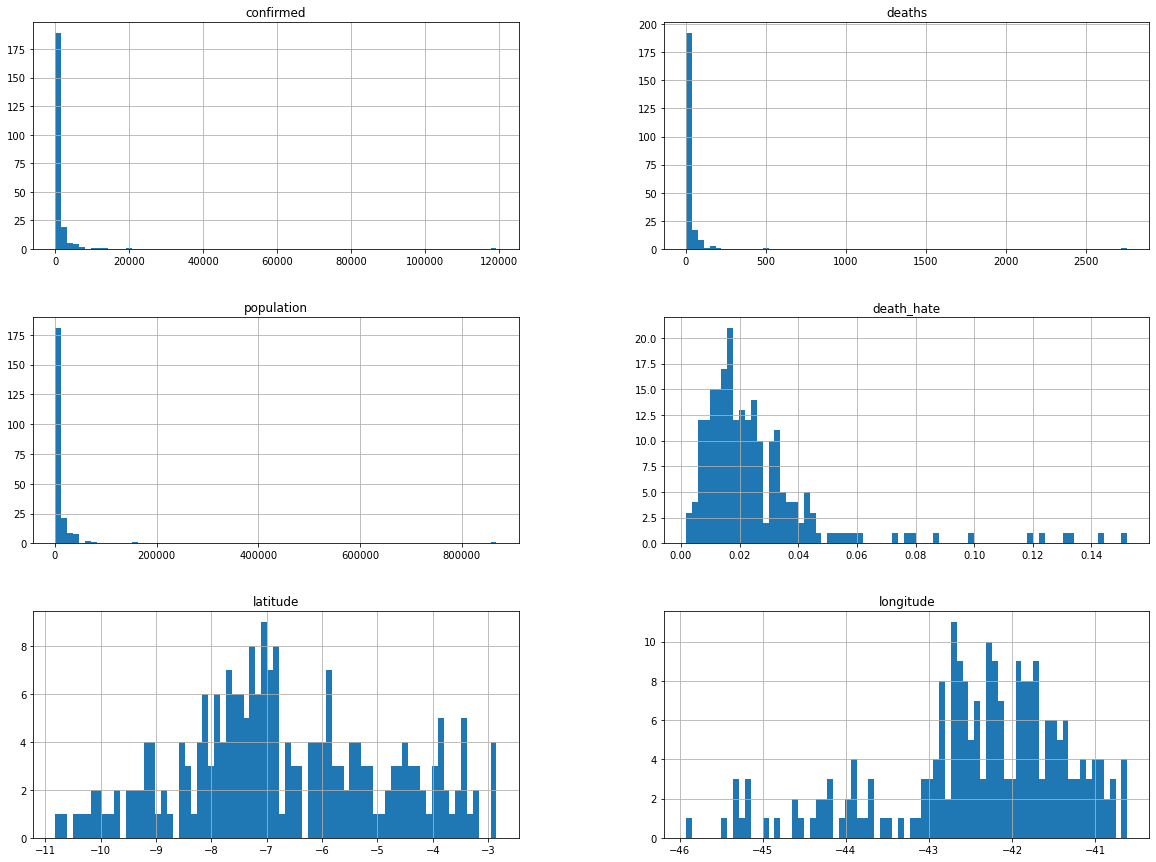

In [72]:
covid_filtered_data.hist(bins=75, figsize=(20,15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

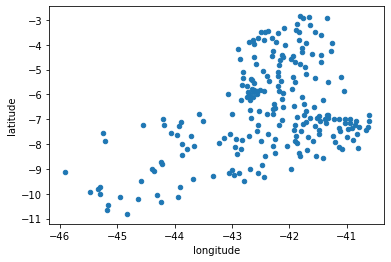

In [73]:
covid_filtered_data.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

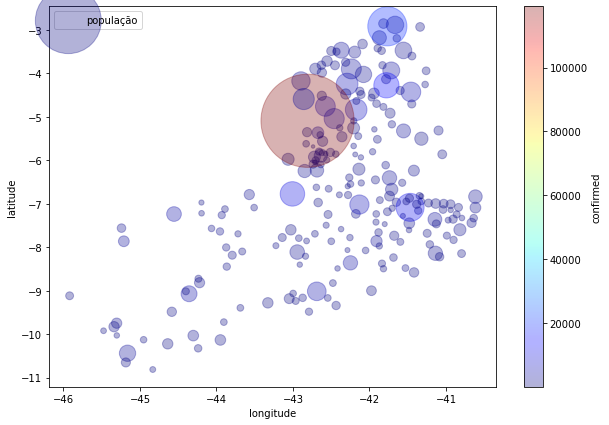

In [74]:
covid_filtered_data.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.3,
    s=covid_filtered_data['population']/100,
    label='população',
    figsize=(10,7),
    c='confirmed',
    cmap=plt.get_cmap('jet'),
    colorbar=True,
    sharex=False
)

In [75]:
matriz_correlation = covid_filtered_data.corr()
matriz_correlation

,confirmed,deaths,population,death_hate,latitude,longitude
confirmed,1.000000,0.996755,0.996275,-0.042708,0.112936,-0.015459
deaths,0.996755,1.000000,0.997791,-0.010849,0.115277,-0.016666
population,0.996275,0.997791,1.000000,-0.022938,0.118598,-0.012695
death_hate,-0.042708,-0.010849,-0.022938,1.000000,-0.166103,-0.169167
latitude,0.112936,0.115277,0.118598,-0.166103,1.000000,0.427193
longitude,-0.015459,-0.016666,-0.012695,-0.169167,0.427193,1.000000


# segunda atividade

In [54]:
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [101]:
covid_target = covid_filtered_data['deaths'].copy()

covid_data = covid_filtered_data.drop('deaths', axis=1)


In [107]:
covid_data.info()
cv = covid_data.drop('city', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        224 non-null    object 
 1   confirmed   224 non-null    int64  
 2   population  224 non-null    float64
 3   death_hate  224 non-null    float64
 4   latitude    224 non-null    float64
 5   longitude   224 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.6+ KB


In [108]:
X_train, X_test, y_train, y_test = train_test_split(cv, covid_target, test_size = 0.2,random_state=1, shuffle=True)

In [109]:
print(X_train)

     confirmed  population  death_hate  latitude  longitude
205       4345     34877.0      0.0157 -9.015052 -42.688691
183        106      4451.0      0.1226 -9.065002 -42.998280
221        400      3080.0      0.0075 -7.604163 -41.482789
130        786      7767.0      0.0076 -6.997268 -41.029733
88         517      5460.0      0.0116 -7.158096 -41.362594
..         ...         ...         ...       ...        ...
203        666     17639.0      0.0210 -5.501526 -41.321428
137        596      4891.0      0.0319 -4.633363 -42.171634
72         308      7029.0      0.0325 -9.341310 -42.436205
140        426      6556.0      0.0305 -6.450426 -41.921957
37         722      8264.0      0.0139 -5.313617 -41.097126

[179 rows x 5 columns]


In [111]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_test)

[[-1.30936296e-01 -1.78441242e-01 -5.96918990e-01 -3.35821703e-01
   1.48317225e+00]
 [-1.04375710e-01 -9.89538693e-02  5.14863336e-02  1.47963624e+00
   5.77142298e-01]
 [-5.15893346e-02 -5.14035251e-02 -4.82261951e-01 -1.87339364e+00
  -1.72738439e+00]
 [-1.43881792e-01 -1.52573485e-01 -4.34022503e-02  1.11680668e+00
   5.44536285e-01]
 [-1.30043503e-01 -1.58997955e-01 -8.38094141e-01  6.34603793e-01
  -3.78657480e-01]
 [-1.18437197e-01 -1.43446413e-01 -5.53428389e-01  1.83889053e+00
  -1.64253237e-02]
 [-1.28034720e-01 -1.53623638e-01 -5.45521007e-01 -6.48037917e-01
   7.47508079e-01]
 [-1.77584721e-01 -1.72680840e-01 -1.18522379e-01 -3.28710046e-02
   1.85615381e-02]
 [-1.13750034e-01 -1.20960768e-01 -3.47836457e-01 -1.29548736e-01
   6.99957560e-01]
 [-1.25133143e-01 -1.51909417e-01 -4.26910277e-01 -2.88303415e-01
   1.42027836e+00]
 [ 1.11105011e+00  9.83384009e-01 -4.54586114e-01 -1.96488604e-01
   8.64193178e-01]
 [-1.57050486e-01 -1.34211237e-01 -3.54948683e-02  1.58877421e+00

In [ ]:
pickle.dump(X_train, open('X_train.pickle', 'wb'))
pickle.dump(X_test, open('X_test.pickle', 'wb'))
pickle.dump(y_train, open('y_train.pickle', 'wb'))
pickle.dump(y_test, open('y_test.pickle', 'wb'))